# Beispiel 11.2: Exotherme Reaktion im polytropen Rohrreaktor
Bearbeitet von Franz Braun

Dieses Beispiel befindet sich im Lehrbuch auf den Seiten 146 - 147. Die Nummerierung
der verwendeten Gleichungen entspricht der Nummerierung im Lehrbuch. Das hier angewendete
Vorgehen entspricht dem im Lehrbuch vorgestellten Lösungsweg.

Zunächst werden die benötigten Pakete importiert.

In [1]:
### Import
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

In diesem Beispiel wird eine irreversible volumenbeständige, exotherme Reaktion 1. Ordnung $\left(\mathrm{A_1} \rightarrow \mathrm{A_2}\right)$ in einem idealen, gekühlten, zylindrischen Rohrreaktor betrachtet.



Es folgt die Parametrierung des betrachteten Systems.

In [2]:
d_R         = 25e-3     # Reaktordurchmesser in m
L_R         = 5         # Reaktorlänge in m
T_K         = 675       # mittlere Kühltemperatur in K
c_1_e       = 2         # Zulaufkonzentration von A1 am in mol m-3
u_e         = 2         # Zulaufgeschwindigkeit in m s-1
T_e         = 663       # Temperatur des Zulaufs in K
k_0         = 5e7       # Frequenzfaktor in s-1
E_A         = 100e3     # Aktivierungsenergie in J mol-1
D_T_ad      = 500       # adiabatische Temperaturerhöhung in K
h_W         = 100       # Wärmedurchgangskoeffizient in W m-2 K-1
rho         = 1         # gravimetrische Dichte in kg m-3
c_p         = 1e3       # spezifische gravimetrische Wärmekapazität in J kg-1 K-1
R           = 8.314     # ideale Gaskonstante in J mol-1 K-1
nu_1        = -1        # stöchiometrischer KOeffizient der Komponente A1

Die Mantelfläche $A_\mathrm{W}$ und die Querschnittsfläche $A_\mathrm{R}$ ergeben sich nach:

\begin{align*}
A_\mathrm{W} &= \pi \, d_\mathrm{R} \, L_\mathrm{R}\\
A_\mathrm{R} &= \pi \, \frac{d_\mathrm{R}^2}{4} 
\end{align*}

In [3]:
A_W = np.pi * d_R * L_R     # Mantelfläche in m2
A_R = np.pi * d_R**2 / 4    # Querschnittsfläche in m2

print('A_W in m2:', np.round(A_W,3))
print('A_R in m2:',np.round(A_R*1e4,2),'e-4')

A_W in m2: 0.393
A_R in m2: 4.91 e-4


Nach der Gleichung 11.6 werden die Prater-, die Stanton, die Arrhenius-Zahl und die dimensionslose Reaktionstemperatur bestimmt.

\begin{align*}
\beta &= \frac{\Delta T_\mathrm{ad}}{T_\mathrm{e}}\\
St &= \frac{h_\mathrm{W}\, A_\mathrm{W}}{u_\mathrm{e} \, A_\mathrm{R} \, {c}_\mathrm{v}}\\
\gamma_\mathrm{e} &= \frac{E_\mathrm{A}}{R\,T_\mathrm{e}}\\
\vartheta_\mathrm{K} &= \frac{\overline{T}_\mathrm{K}}{T_\mathrm{e}}
\end{align*}

In [4]:
beta    = D_T_ad / T_e                          # Prater-Zahl
St      = h_W * A_W / (u_e * A_R * rho * c_p)   # Stanton-Zahl
gamma_e = E_A / (R * T_e)                       # Arrhenius-Zahl 
theta_K = T_K / T_e                             # dimensionslose Kühltemperatur

print('beta:',np.round(beta,3))
print('St:',np.round(St,0))
print('gamma_e:',np.round(gamma_e,2))
print('theta_K:',np.round(theta_K,3))

beta: 0.754
St: 40.0
gamma_e: 18.14
theta_K: 1.018


Die Reaktionsgeschwindigkeit unter Zulaufbedingungen ist definiert über:

\begin{align*}
r_\mathrm{e} &= k_0 \exp{(-\gamma_\mathrm{e})} \, c_{1,\mathrm{e}}.
\end{align*}

Mit der mittleren Verweilzeit $\overline{\tau}$ kann die Damköhler-Zahl unter Zulaufbedingungen bestimmt werden:

\begin{align*}
\overline{\tau} &= \frac{L_\mathrm{R}}{u_\mathrm{e}}\\
Da_\mathrm{I} &= \frac{\overline{\tau}\,r_\mathrm{e}}{c_{1,\mathrm{e}}}
\end{align*}

In [5]:
r_e     = k_0 * np.exp(- gamma_e) * c_1_e       # Reaktionsgeschwindigkeit unter Zulaufbedingungen in mol m-3 s-1
tau     = L_R / u_e                             # mittlere Verweilzeit in s
Da      = tau * r_e / c_1_e                     # Damköhler - Zahl

print('r_e in mol m-3 s-1:',np.round(r_e,3))
print('tau in s:',np.round(tau,3))
print('Da:',np.round(Da,3))

r_e in mol m-3 s-1: 1.322
tau in s: 2.5
Da: 1.652


Die dimensionslose Reaktionsgeschwindigkeit $\omega$ ist definiert als:

\begin{align*}
\omega &= \frac{r_j}{r_{1,\mathrm{e}}} = \frac{k_0 \exp{\left(\frac{- E_\mathrm{A}}{R\,T}\right)} \, c_{1}}{k_0 \exp{(-\gamma_\mathrm{e})} \, c_{1,\mathrm{e}}},\\
&= \frac{\exp{\left(\frac{- E_\mathrm{A}}{R\,T} \frac{T_\mathrm{e}}{T_\mathrm{e}}\right)}}{\exp{(-\gamma_\mathrm{e})}} \, f_1,\\
&= \frac{\exp{\left( - \gamma_\mathrm{e} \frac{1}{\vartheta}\right)}}{\exp{(-\gamma_\mathrm{e})}} \, f_1,\\
&= \exp{\left(\gamma_\mathrm{e} \left(1 -  \frac{1}{\vartheta} \right) \right)} f_1.
\end{align*}


Es folgt die Implementierung einer Funktion für die Berechnung der dimensionslosen Reaktionsgeschwindigkeit.

In [6]:
def cal_omega(theta,f_1):
    '''
    Funktion zur Berechnung der dimensionslosen Reaktionsgeschwindigkeit omega

    Parameter:
    ----------
    theta       : dimensionslose Reaktortemperatur
    f_1         : Restanteil A1 
    gamma_e     : Arrhenius-Zahl 
    '''

    omega = np.exp(gamma_e * (1- 1 / theta)) * f_1

    return omega

Durch das Einsetzen dieser Zahlenwerte in die Material- und Energiebilanz (Gleichungen 11.7a und 11.7b) ergibt sich folgendes DGL - System:

\begin{align*}
\frac{\mathrm{\partial}f_i}{\mathrm{\partial}\theta} &= - \frac{\mathrm{\partial}f_i}{\mathrm{\partial}\xi} + Da_\mathrm{I} \sum^{M}_{j=1} \nu_{i,j} \, \omega, \\
\frac{\mathrm{\partial}\vartheta}{\mathrm{\partial}\theta} &= - \frac{\mathrm{\partial}\vartheta}{\mathrm{\partial}\xi} + Da_\mathrm{I} \sum^M_{j=1} \beta_j \omega - St (\vartheta - \vartheta_\mathrm{K}).
\end{align*}

Mit der Annahme einer stationären Betriebsführung ergeben sich für die betrachtete Reaktion:
\begin{align*}
\frac{\mathrm{\partial}f_i}{\mathrm{\partial}\xi} &=  Da_\mathrm{I} \, \nu_{i} \, \omega, \\
\frac{\mathrm{\partial}\vartheta}{\mathrm{\partial}\xi} &=  Da_\mathrm{I} \, \beta \, \omega - St (\vartheta - \vartheta_\mathrm{K}).\\
\end{align*}

Es gelten folgende Randbedingungen am Reaktoreintritt:
\begin{align*}
f_1 (\xi = 0) &= 1,\\
\vartheta (\xi = 0) &= 1.
\end{align*}

Entsprechende Bilanzen werden in der Funktion _Rohrreaktor_ implementiert.

In [7]:
def Rohrreaktor(xi,y):
    '''
    Funktion mit der dimensionslosen Material- und Energiebilanz eines Rohreaktors

    Parameter:
    ----------
    f_1     : Restanteil A1
    theta   : dimensionslose Reaktortemperatur
    T       : Reaktortemperatur in K
    c_1     : Konzentration von A1 in mol m3 
    omega   : dimensionslose Reaktionsgeschwindigkeit
    dfdxi   : Änderung des Restanteils von A1 mit der Ortskoordinate 
    dthdxi  : Änderung der dimensionslosen Reaktortemperatur mit der Ortskoordinate
    '''
    
    f_1     = y[:1]                     # Restanteil von A1
    theta   = y[-1]                     # dimensionslose Reaktortemperatur

    # Berechnung der Reaktionsgeschwindigkeit
    omega   = cal_omega(theta,f_1)

    # Material- und Energiebilanz
    df1dxi  = Da * nu_1 * omega
    dthdxi  = Da * beta * omega - St * (theta - theta_K)

    return np.vstack((df1dxi, dthdxi))

Anschließend wird das implementierte Differentialgleichungssystem mit _solve\_ivp_ gelöst.

In [8]:
xi_span  = np.array([0, 1])                             # dimensionslose Ortskoordinate
xi_eval  = np.linspace(xi_span[0], xi_span[1], 1000)    # Diskretisierung 
y_0      = np.array([1, 1])                             # Randbedingungen am Reaktoreintritt xi = 0 : Restanteil A1 und dimensionslose Reaktortemperatur
                         
sol      = solve_ivp(Rohrreaktor, xi_span, y_0, t_eval = xi_eval, method = 'LSODA', rtol = 1e-5)

# Ausgabe der Solver-Nachricht, wenn der Solver die DGL nicht lösen konnte
if sol.success != True:
    print(sol.success)
    print(sol.message)

# Ergebnisse
xi      = sol.t     # dimensionslose Ortskoordinate
f_1     = sol.y[0]  # Restanteil A1
theta   = sol.y[1]  # dimensionslose Reaktortemperatur

Abschließend werden die Ergebnisse grafisch dargestellt. Dazu werden die dimensionslosen Ergebnisse in die entsprechenden dimensionsbehafteten Größen umgewandelt.

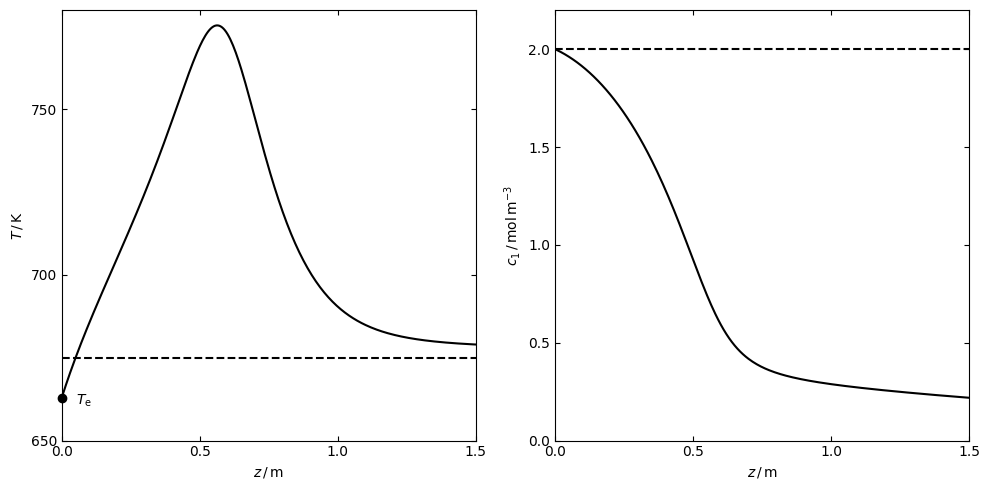

In [9]:
# Umrechnung der dimensionslosen Größen in entsprechende dimensionsbehaftete Größen
z   = xi * L_R      # Ortskoordinate in m
c_1 = f_1 * c_1_e   # Konzentration von A1 in mol m3
T   = theta * T_e   # Reaktortemperatur in K


fig, ax = plt.subplots(1, 2, figsize = (10, 5))
ax[0].plot(z, T, color = 'black')
ax[0].axhline(y = T_K, xmin=0, xmax=5, linestyle = '--', color = 'k', label = r'$T_\mathrm{K}$')
ax[0].scatter(0, T_e,  color = 'k', clip_on = False)
ax[0].annotate(r'$T_\mathrm{e}$',(0.05, T_e-2), fontsize = 10)
ax[0].tick_params(axis="y",direction="in", right = True)
ax[0].tick_params(axis="x",direction="in", top = True)
ax[0].set_ylabel(r'$T\,/\,\mathrm{K}$')
ax[0].set_xlabel(r'$z \,/\,\mathrm{m}$')
ax[0].set_xlim(0,1.5)
ax[0].set_ylim(650,780)
ax[0].set_xticks(np.arange(0, 1.51, step = 0.5))
ax[0].set_yticks(np.arange(650, 751, step = 50))

ax[1].plot(z,c_1, color = 'black')
ax[1].axhline(y=2, xmin=0, xmax=5, linestyle = '--', color = 'k')
ax[1].tick_params(axis="y",direction="in", right = True)
ax[1].tick_params(axis="x",direction="in", top = True)
ax[1].set_ylabel(r'$c_1\,/\,\mathrm{mol\,m^{-3}}$')
ax[1].set_xlabel(r'$z \,/\,\mathrm{m}$')
ax[1].set_xlim(0,1.5)
ax[1].set_ylim(0,2.2)
ax[1].set_xticks(np.arange(0, 1.51, step = 0.5))
ax[1].set_yticks(np.arange(0, 2.1, step = 0.5))

plt.tight_layout()
plt.show()